<a href="https://colab.research.google.com/github/fralfaro/MAT281_20XX/blob/main/docs/lectures/data_manipulation/vi_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Seaborn 

## Visualización Declarativa


Es un paradigma de visualización en donde se busca preocuparse de los datos y sus relaciones, más que en detalles sin mayor importancia. Algunas características son:

* Se especifica lo que se desea hacer.
* Los detalles se determinan automáticamente.
* Especificación y Ejecución están separadas.

A modo de resumen, se refiere a construir visualizaciones a partir de los siguientes elementos:

* _Data_
* _Transformation_
* _Marks_
* _Encoding_
* _Scale_
* _Guides_

**Diferencias entre enfoques**

| Imperativa  | Declarativa | 
| ------|------------ | 
| Especificar _cómo_ se debe hacer algo | Especificar _qué_ se quiere hacer |
| Especificación y ejecución entrelazadas | Separar especificación de ejecución |
| _Colocar un círculo rojo aquí y un círculo azul acá_ | _Mapear `x` como posición e `y` como el color_ |


**Ejemplo**

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Este ejemplo  servirá para mostrar una de las mayores diferencias entre una visualización imperativa (como `matplotlib`) versus una declarativa (como `seaborn`).

<img src="https://drive.google.com/uc?export=view&id=1GBdaomPFTDWfmxPBXy8BgYGXeb4b4dmw" width = "500" align="center"/>



In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
iris_df = pd.read_csv(
    "https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/data_manipulation/visualization/data/iris.csv"
    
)
iris_df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

iris_df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


El ejemplo clásico consiste en graficar _sepalWidth_ versus _petalLength_ y colorear por especie. 

**Imperativo**

En `matplotlib` sería algo así:

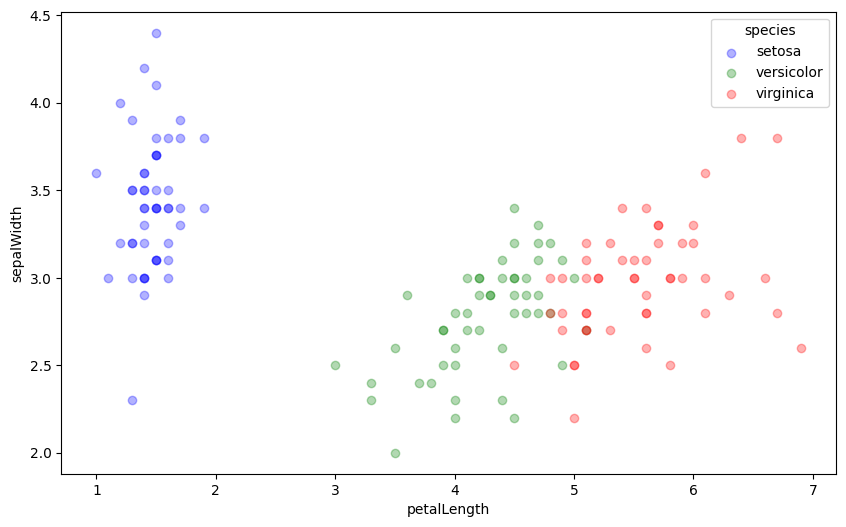

In [3]:
color_map = dict(zip(iris_df["species"].unique(), 
                     ["blue", "green", "red"]))

plt.figure(figsize=(10, 6))

for species, group in iris_df.groupby("species"):
    plt.scatter(group["petalLength"], 
                group["sepalWidth"],
                color=color_map[species],
                alpha=0.3,
                edgecolor=None,
                label=species,
               )
    
plt.legend(frameon=True, title="species")
plt.xlabel("petalLength")
plt.ylabel("sepalWidth")
plt.show()

**Declarativo**

En `seaborn` sería algo así:

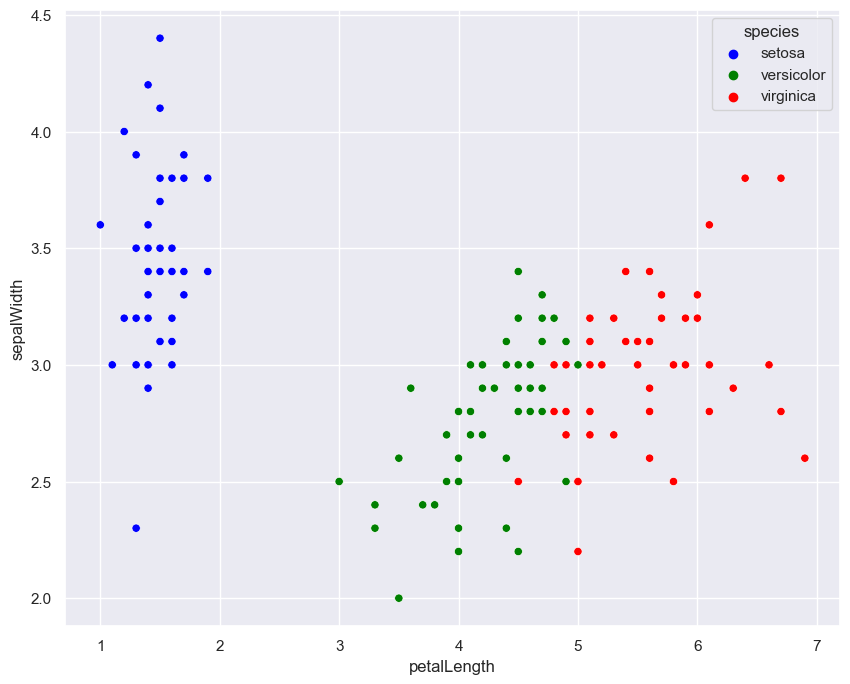

In [4]:
sns.set(rc={'figure.figsize':(10,8)})

sns.scatterplot(
        x='petalLength',
        y='sepalWidth',
        data=iris_df,
        hue='species',
        palette = ['blue', 'green', 'red']
    
)
plt.show()

## Acerca de Seaborn

<img src="https://drive.google.com/uc?export=view&id=13qc_VfC6raJYbAWG2PIxFbousqCzZoa3" width = "200" align="center"/>



`Matplotlib` ha demostrado ser una herramienta de visualización increíblemente útil y popular, pero incluso los usuarios entusiastas admitirán que a menudo deja mucho que desear. Hay varias quejas válidas sobre Matplotlib que a menudo surgen:

* Antes de la versión 2.0, los valores predeterminados de Matplotlib no son exactamente las mejores opciones. Se basó en MATLAB alrededor de 1999, y esto a menudo se nota.


* La API de Matplotlib es de nivel relativamente bajo. Es posible realizar una visualización estadística sofisticada, pero a menudo requiere mucho código repetitivo.
Matplotlib fue anterior a Pandas en más de una década y, por lo tanto, no está diseñado para su uso con Pandas DataFrames. Para visualizar datos de un Pandas DataFrame, debe extraer cada Serie y, a menudo, concatenarlas juntas en el formato correcto. Sería mejor tener una biblioteca de trazado que pueda usar inteligentemente las etiquetas de DataFrame en un trazado.

Una respuesta a estos problemas es `Seaborn`. Seaborn proporciona una API sobre Matplotlib que ofrece opciones sensatas para el estilo de trazado y los valores predeterminados de color, define funciones simples de alto nivel para tipos de trazado estadísticos comunes, y se integra con la funcionalidad proporcionada por Pandas DataFrames.

## Gráfico a Gráfico

Para mostrar el funcionamiento de seaborn, se ocupa el conjunto de datos: **pokemon.csv**. Para el caso de `seaborn` se los gráficos serán generados directamente desde el dataframe.

<img src="https://drive.google.com/uc?export=view&id=1WYKAq-hjBVpP-u_nLFT-djJPkKA73Ap3" width = "300" align="center"/>



In [5]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [6]:
# cargar datos
url='https://drive.google.com/file/d/1uVJcfTBWemOTfxmjWTqALfUpIMdH3LVV/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

pokemon_data = pd.read_csv(url, sep=",")
pokemon_data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


### Gráfico de línea y puntos

Realizar un gráfico de línea y otro de  puntos para analizar el ataque vs defensa de todos los pokemones separados por generación.

C:\Users\franc\AppData\Local\Temp\ipykernel_22240\3612574168.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


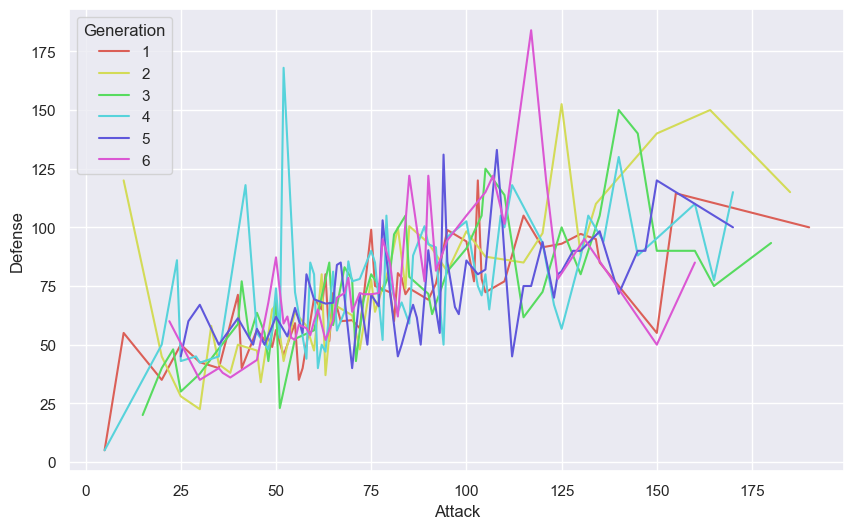

In [7]:
# grafico de linea
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)

sns.lineplot(
    x='Attack',
    y='Defense',
    hue='Generation',# color por Generation
    data=pokemon_data,
    ci = None,
    palette=palette
)   
plt.show()

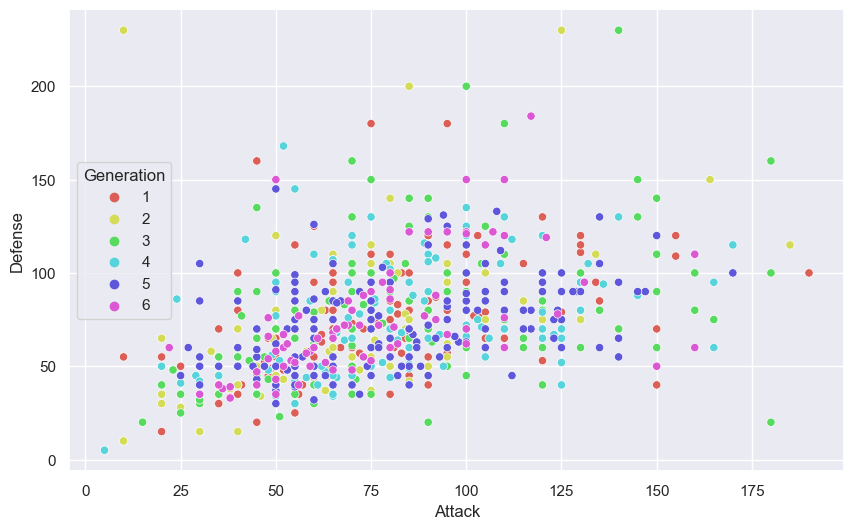

In [8]:
# grafico de puntos
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Attack',
    y='Defense',
    hue='Generation',# color por Generation
    data=pokemon_data,
    palette=palette
)   
plt.show()

### Boxplot

Realizar un gráfico box plot sobre los stats de los pokemones.

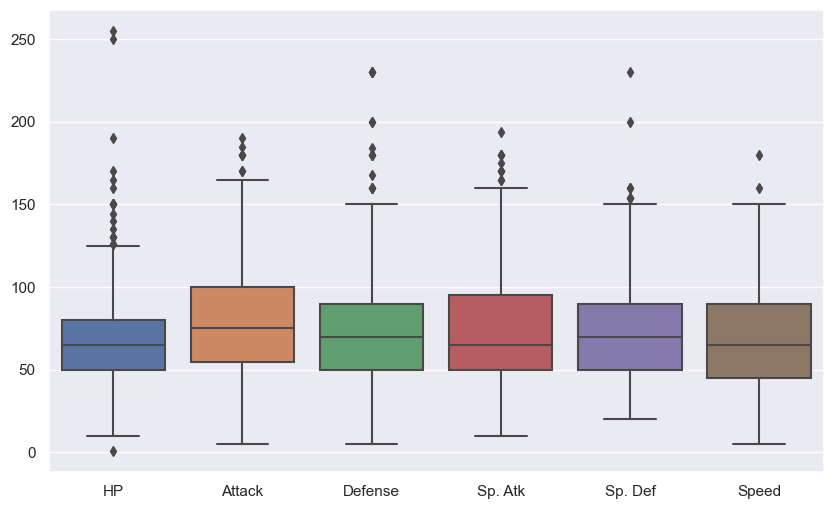

In [9]:
# Pre-format DataFrame
stats_df = pokemon_data.drop(['#', 'Generation', 'Legendary'], axis=1)
 
# New boxplot using stats_df
plt.figure(figsize=(10, 6))
sns.boxplot(data=stats_df)
plt.show()

### Mapas de calor

Realizar un mapa de calor sobre los stats de los pokemones.

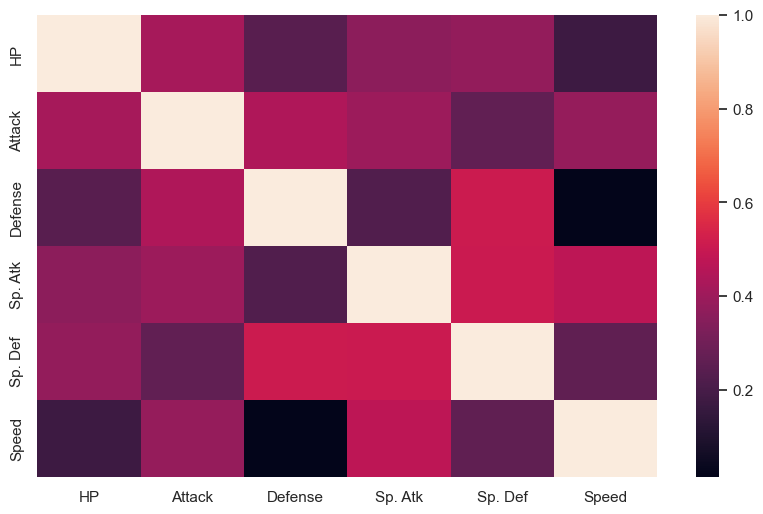

In [10]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr)
plt.show()

### Histogramas

Realizar un histograma del stat **attack**.

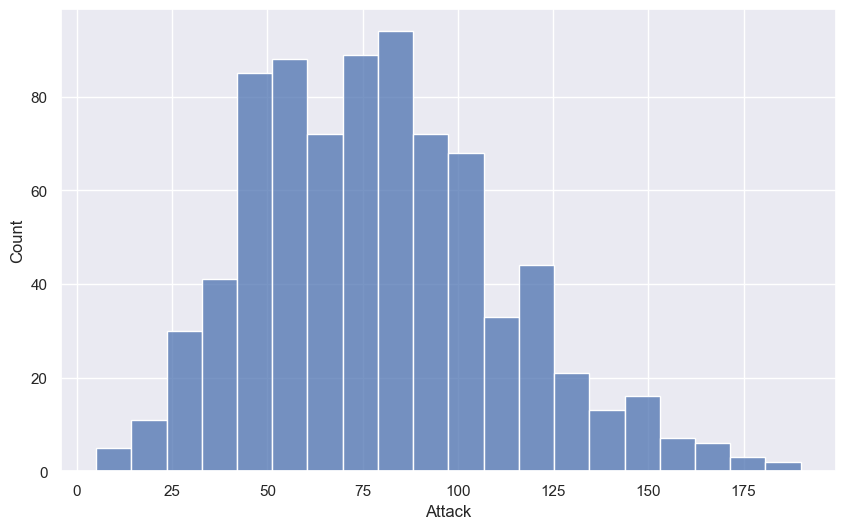

In [11]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(pokemon_data.Attack)
plt.show()

### Barplot

Realizar un bar plot  sobre la cantidad de pokemones que hay por generación

In [12]:
# realizar conteo de manera manual
df_generation = pokemon_data.groupby('Generation').apply(lambda x: len(x)).reset_index()
df_generation.columns = ['Generation','Count']
df_generation.head()

,Generation,Count
0,1,166
1,2,106
2,3,160
3,4,121
4,5,165


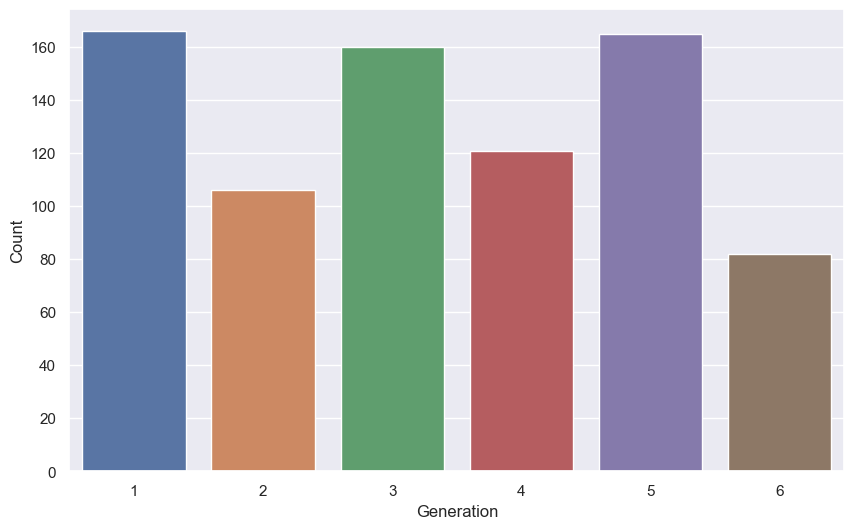

In [13]:
# plot seaborn: barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Generation',
    y='Count',
    data=df_generation 
)
plt.show()

### countplot

Realizar un conteo sobre los distintos tipos **Type 1** de pokemones.

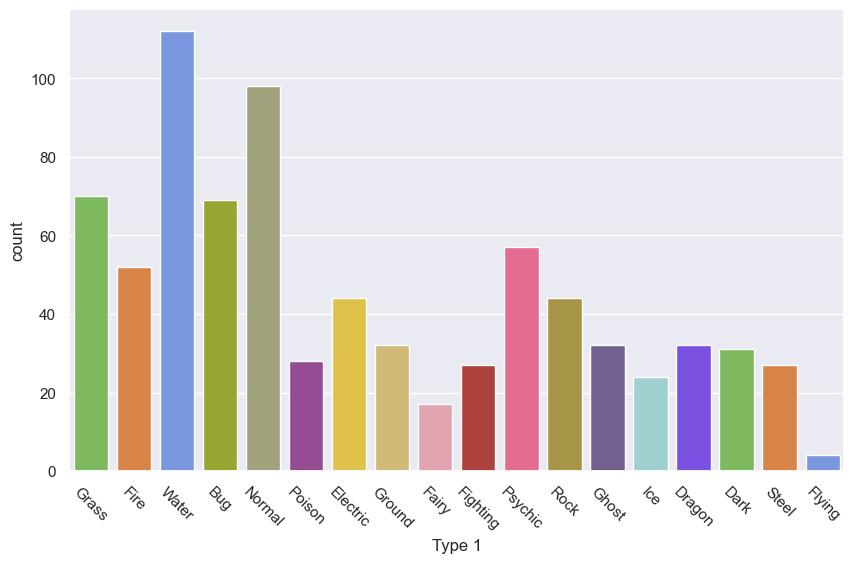

In [14]:
# Count Plot (a.k.a. Bar Plot)

plt.figure(figsize=(10, 6))
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.countplot(x='Type 1', 
              data=pokemon_data,
              palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.show()

### Factor plot

Realizar un catplot de los distintos tipos de pokemones para la generación **Type 1**, analizando si el pokemón es legendario o no.

<Figure size 1600x1200 with 0 Axes>

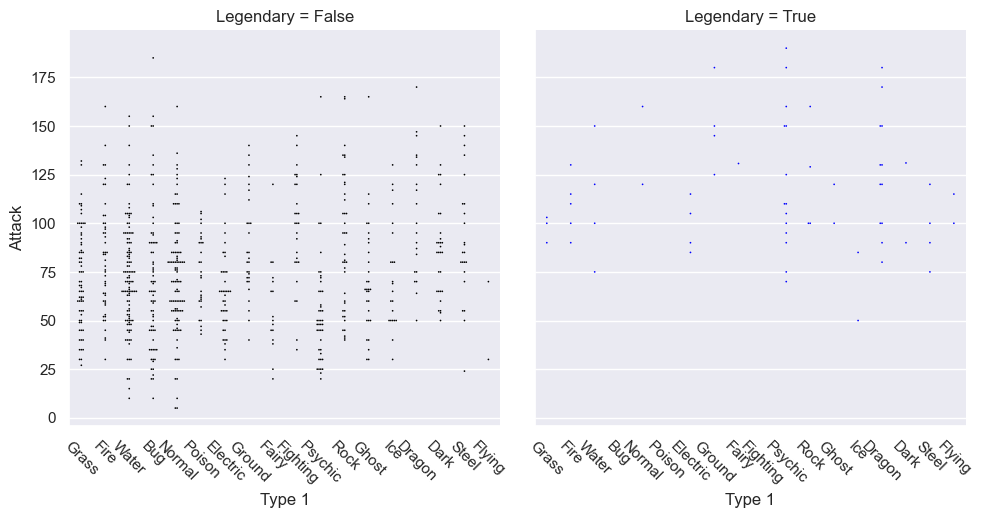

In [15]:
# Factor Plot
plt.figure(figsize=(16, 12))
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=pokemon_data, 
                   hue='Legendary',  # Color by stage
                   col='Legendary',  # Separate by stage
                   kind='swarm', # Swarmplot
                   s = 1.5,
                   palette = ['black','blue'])
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)
plt.show()

### Customizando con Matplotlib.

Seaborn es una interfaz de alto nivel para Matplotlib. Según nuestra experiencia, Seaborn lo llevará a la mayor parte del camino, pero a veces necesitará traer Matplotlib.

Establecer los límites de los ejes es uno de esos momentos, pero el proceso es bastante simple:

Primero, usar la función lmplotde  Seaborn de manera normal.
Luego, use las funciones de customización de Matplotlib. En este caso, usaremos sus funciones *ylim ()* y *xlim ()*.
Aquí está nuestro nuevo diagrama de dispersión con límites de ejes sensibles:

<Figure size 1000x600 with 0 Axes>

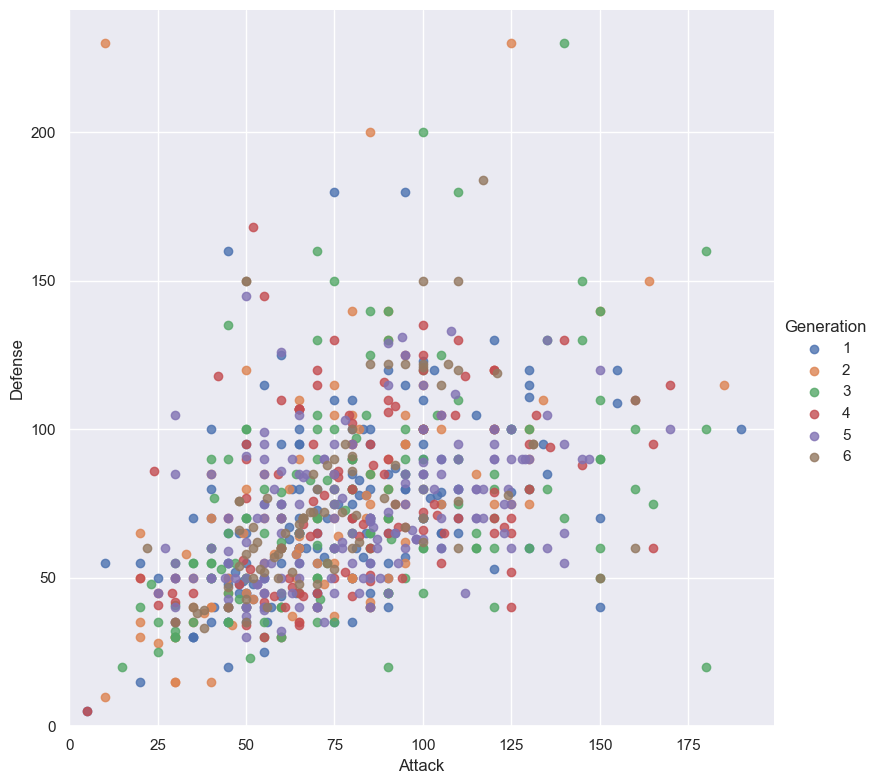

In [16]:
# plot seaborn
plt.figure(figsize=(10, 6))
sns.lmplot(x='Attack',
           y='Defense', 
           data=pokemon_data,
           fit_reg=False, 
           height=8,
           hue='Generation')
 
# usar Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

## Referencias

1. [Gallery-seaborn](https://seaborn.pydata.org/)
